In [33]:
from tensorflow.keras import Sequential, losses, optimizers, applications, callbacks
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2 
import os
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [34]:
EPOCHS = 100
BATCH_SIZE = 32
IMG_SIZE = 200
CATEGORIES = 3
LEARNING_RATE = 0.001

In [35]:
labels = ["bear", "deer", "squirrel"]
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    random.shuffle(data)
    return np.array(data)

In [36]:
train = get_data("Dataset/Train")
test = get_data("Dataset/Test")

C:\Users\Admin\AppData\Local\Temp/ipykernel_24232/356720172.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [37]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

x_train = np.array(x_train) / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.array(x_test) / 255.0
x_test = np.expand_dims(x_test, -1)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
data_gen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=30,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)
data_gen.fit(x_train)

In [39]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(CATEGORIES, activation="softmax")
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

learn = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/100
65/65 [==============================] - 57s 875ms/step - loss: 1.0865 - accuracy: 0.4132 - val_loss: 1.0471 - val_accuracy: 0.4484
Epoch 2/100
65/65 [==============================] - 91s 1s/step - loss: 1.0148 - accuracy: 0.5051 - val_loss: 1.1261 - val_accuracy: 0.4164
Epoch 3/100
65/65 [==============================] - 95s 1s/step - loss: 0.9605 - accuracy: 0.5762 - val_loss: 0.9782 - val_accuracy: 0.5326
Epoch 4/100
65/65 [==============================] - 99s 2s/step - loss: 0.8876 - accuracy: 0.6613 - val_loss: 0.9236 - val_accuracy: 0.6145
Epoch 5/100
65/65 [==============================] - 98s 2s/step - loss: 0.8196 - accuracy: 0.7315 - val_loss: 0.9111 - val_accuracy: 0.6228
Epoch 6/100
65/65 [==============================] - 97s 1s/step - loss: 0.7688 - accuracy: 0.7862 - val_loss: 0.9097 - val_accuracy: 0.6346
Epoch 7/100
65/65 [==============================] - 96s 1s/step - loss: 0.7308 - accuracy: 0.8278 - val_loss: 0.8793 - val_accuracy: 0.6607
Epoch 8/10

65/65 [==============================] - 55s 843ms/step - loss: 0.5837 - accuracy: 0.9686 - val_loss: 0.8764 - val_accuracy: 0.6714
Epoch 59/100
65/65 [==============================] - 53s 813ms/step - loss: 0.5767 - accuracy: 0.9753 - val_loss: 0.8849 - val_accuracy: 0.6595
Epoch 60/100
65/65 [==============================] - 53s 818ms/step - loss: 0.5735 - accuracy: 0.9777 - val_loss: 0.8925 - val_accuracy: 0.6501
Epoch 61/100
65/65 [==============================] - 62s 948ms/step - loss: 0.5743 - accuracy: 0.9782 - val_loss: 0.8689 - val_accuracy: 0.6821
Epoch 62/100
65/65 [==============================] - 59s 914ms/step - loss: 0.5785 - accuracy: 0.9729 - val_loss: 0.8817 - val_accuracy: 0.6655
Epoch 63/100
65/65 [==============================] - 56s 861ms/step - loss: 0.5737 - accuracy: 0.9782 - val_loss: 0.8725 - val_accuracy: 0.6738
Epoch 64/100
65/65 [==============================] - 56s 861ms/step - loss: 0.5739 - accuracy: 0.9782 - val_loss: 0.8806 - val_accuracy: 0.665

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)
print("Test loss: ", test_loss)

27/27 - 6s - loss: 0.8637 - accuracy: 0.6809
Test accuracy: 0.6809015274047852
Test loss:  0.8636864423751831


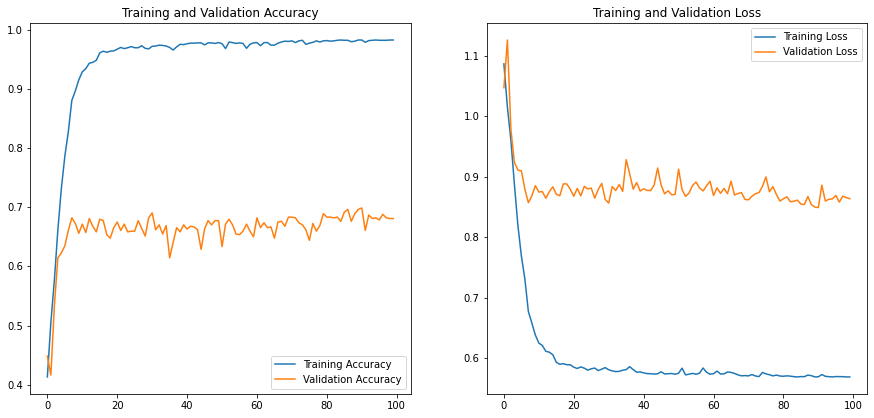

In [41]:
acc = learn.history['accuracy']
val_acc = learn.history['val_accuracy']
loss = learn.history['loss']
val_loss = learn.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1, -1)[0]
print(classification_report(y_test, predictions, target_names=['Bear', 'Deer', "Squirrel"]))

              precision    recall  f1-score   support

        Bear       0.66      0.57      0.61       225
        Deer       0.74      0.76      0.75       320
    Squirrel       0.64      0.68      0.66       298

    accuracy                           0.68       843
   macro avg       0.68      0.67      0.67       843
weighted avg       0.68      0.68      0.68       843



In [43]:
model.save("Weights/model.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 147456)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              